In [15]:
from models.cnn_gru import GRU
from models.cnn_lstm import LSTM
from models.cnn_rnn import RNN
from models.vanilla_cnn import CNN
from utils.utils import fit
import torch
import torch.nn as nn
from torch.optim import Adam

%load_ext autoreload
%autoreload 2

device = torch.device('cpu')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Shape of training set: (10035, 22, 400)
Shape of validation set: (1000, 22, 400)
Shape of training labels: (10035,)
Shape of validation labels: (1000,)
Shape of training labels after categorical conversion: (10035, 4)
Shape of validation labels after categorical conversion: (1000, 4)
Shape of test labels after categorical conversion: (443, 4)


100%|██████████| 32/32 [00:03<00:00,  8.82it/s]


Epoch 1/2 loss: 1.391171028659602, acc: 0.2681614349775785, val_loss: 1.3921357616782188, val_acc: 0.26


100%|██████████| 32/32 [00:03<00:00,  8.05it/s]


Epoch 2/2 loss: 1.3815776500732275, acc: 0.2795216741405082, val_loss: 1.3865818157792091, val_acc: 0.28


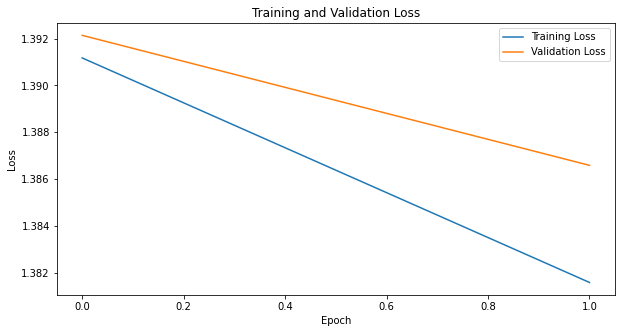

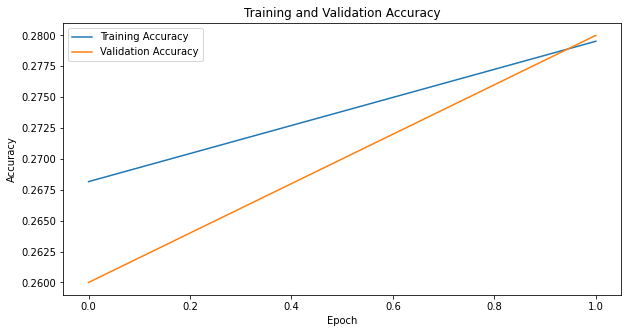

In [16]:
model = GRU(input_dim=22, conv_dims=[32, 64, 128], hidden_dim=256, num_layers=1)
model.to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

fit(model, optimizer, criterion, num_epochs=2, device=device)

In [ ]:
model = LSTM(input_dim=22, conv_dims=[16, 32, 48, 64], hidden_dim=64, num_layers=1)
model.to(device)
# model = LSTM(input_dim=22, conv_dims=[32, 64], hidden_dim=128, num_layers=1)

optimizer = Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

fit(model, optimizer, criterion, num_epochs=2, device=device)

In [ ]:
model = RNN(input_dim=22, conv_dims=[32, 64, 128, 256], hidden_dim=128, num_layers=1)
model.to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

fit(model, optimizer, criterion, num_epochs=100, device=device)

In [ ]:
kernel_size = 11
pad = 5

model = CNN(kernel_size=kernel_size, pad=pad)
model.to(device)

weight_decay = 1e-2

lr = 1e-3
optimizer = torch.optim.SGD(params=model.parameters(), momentum=0.9, lr=lr, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

fit(model, optimizer, criterion, num_epochs=62, device=device)